In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

In [2]:
haberman = pd.read_csv("haberman.csv")

In [3]:
haberman.head()


,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
haberman.tail()

,age,year,nodes,status
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


In [5]:
print (haberman.shape)

(306, 4)


This tells us that the dataset has 306 data points and 4 features

In [6]:
print (haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [7]:
haberman["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

This tells us that , out of all the observations takes, 225 patients lived for 5 years or more and 81 patients died within 5 years.

UNIVATIATE ANALYSIS

Histograms

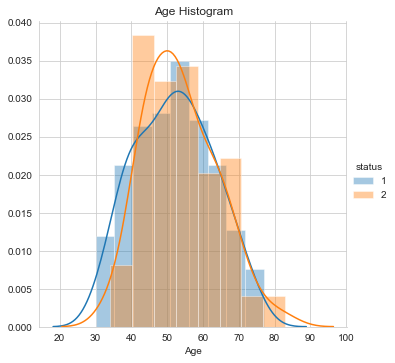

In [37]:
g=sns.FacetGrid(haberman, hue="status", height=5)
g=g.map(sns.distplot, "age").add_legend();
g.axes[0,0].set_xlabel('Age')
plt.title('Age Histogram')
plt.show();

Too much overlapping. Therefore age is not the right parameter for univariate consideration

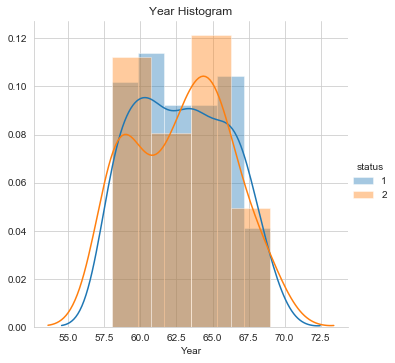

In [38]:
g=sns.FacetGrid(haberman, hue="status", height=5)
g=g.map(sns.distplot, "year").add_legend();
g.axes[0,0].set_xlabel('Year')
plt.title('Year Histogram')
plt.show();

Too much overlapping. Therefore year is not the right parameter for univariate consideration

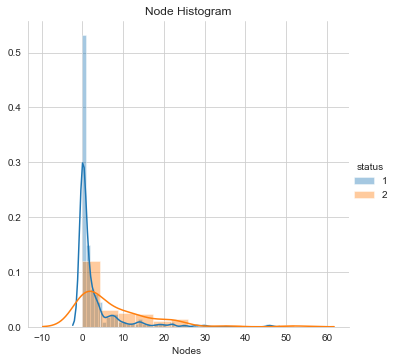

In [40]:
g=sns.FacetGrid(haberman, hue="status", height=5)
g=g.map(sns.distplot, "nodes").add_legend();
g.axes[0,0].set_xlabel('Nodes ')
plt.title('Node Histogram')
plt.show();

Better plot for analysis when compared to the age and year plots. It can also be observed that as the number of nodes inceases, the number of patients living after 5 years decreases.

Box plot

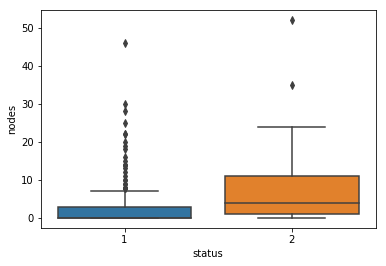

In [11]:
sns.boxplot(x='status',y='nodes', data=haberman)
plt.show()

Majority of the patients who survived cancer and are alivefor 5 years and above have close to zero nodes.













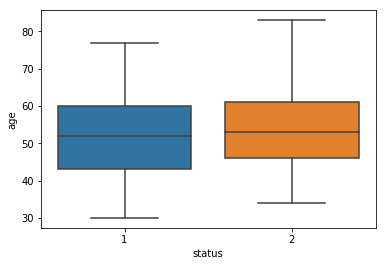

In [12]:
sns.boxplot(x='status',y='age', data=haberman)
plt.show()

Nothing of importance can be inferred from this box plot of age 

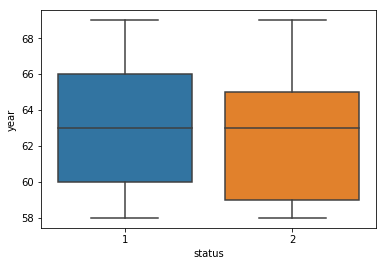

In [13]:
sns.boxplot(x='status',y='year', data=haberman)
plt.show()

Nothing of importance can be inferred from this box plot of year

Violin plot

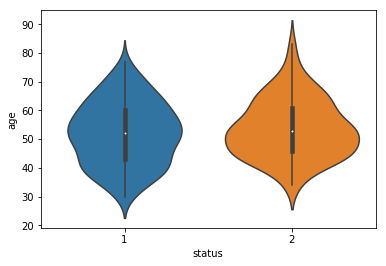

In [14]:
sns.violinplot(x="status", y="age", data=haberman, height=8)
plt.show()

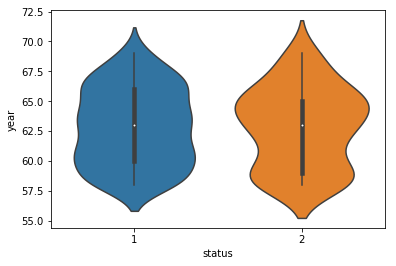

In [15]:
sns.violinplot(x="status", y="year", data=haberman, height=8)
plt.show()

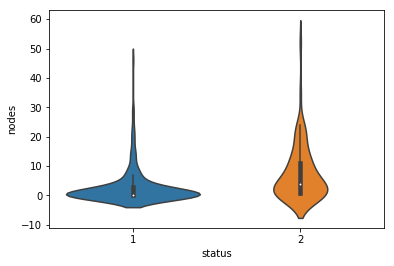

In [16]:
sns.violinplot(x="status", y="nodes", data=haberman, height=8)
plt.show()

Majority of the patients who survived cancer and are alivefor 5 years and above have close to zero nodes.


PDF and CDF

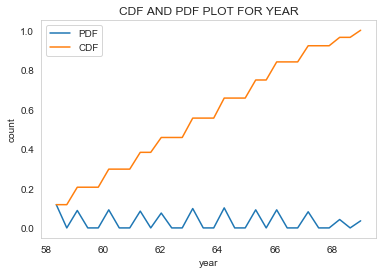

In [42]:
counts,bin_edges = np.histogram(haberman['year'],bins = 30, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label = "PDF")
plt.plot(bin_edges[1:],cdf,label="CDF")
plt.legend()




plt.xlabel('year')
plt.ylabel('count')
plt.title("CDF AND PDF PLOT FOR YEAR")
plt.grid()

plt.show()

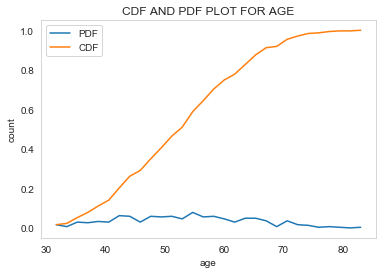

In [45]:
counts,bin_edges = np.histogram(haberman['age'],bins = 30, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label = "PDF")
plt.plot(bin_edges[1:],cdf,label="CDF")
plt.legend()




plt.xlabel('age')
plt.ylabel('count')
plt.title("CDF AND PDF PLOT FOR AGE")
plt.grid()

plt.show()

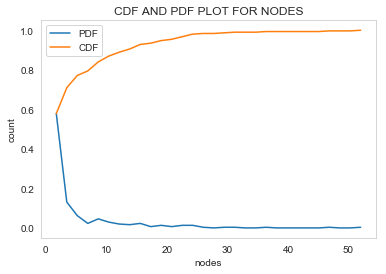

In [46]:
counts,bin_edges = np.histogram(haberman['nodes'],bins = 30, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label = "PDF")
plt.plot(bin_edges[1:],cdf,label="CDF")
plt.legend()




plt.xlabel('nodes')
plt.ylabel('count')
plt.title("CDF AND PDF PLOT FOR NODES")
plt.grid()

plt.show()

BIVARIATE ANALYSIS

Scatter plot

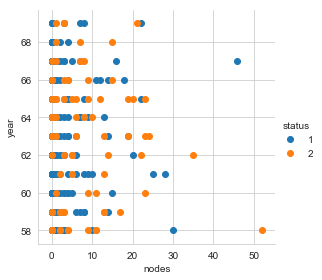

In [20]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", height=4).map(plt.scatter, "nodes", "year").add_legend();
plt.show();

Too much overlapping

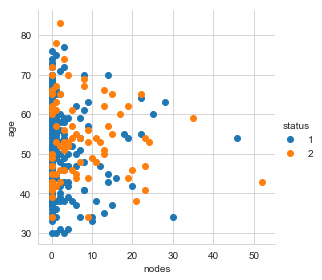

In [21]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", height=4).map(plt.scatter, "nodes", "age").add_legend();
plt.show();

Even more overlapping

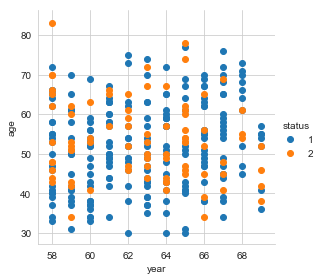

In [22]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", height=4).map(plt.scatter, "year", "age").add_legend();
plt.show();

Nothing can be inferred fromthe above 2D scatter plots because of excessive overlapping.

Pair plots

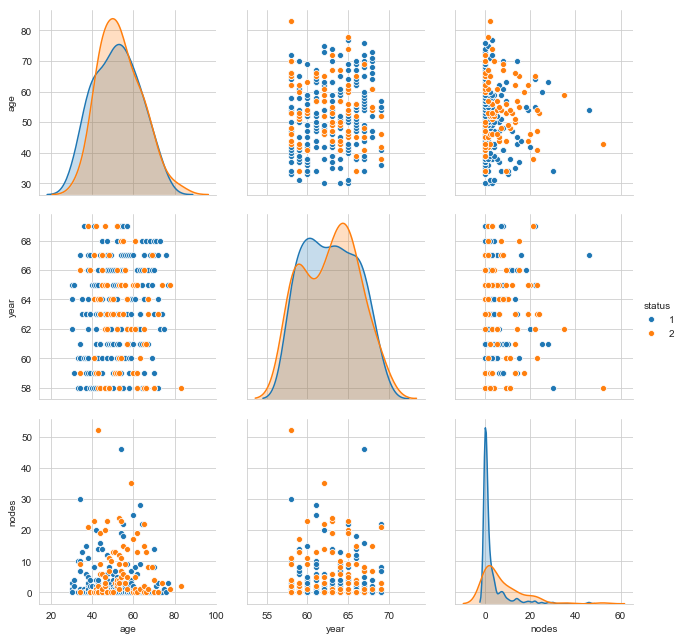

In [48]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="status", height=3, vars=["age","year","nodes"]);
plt.show()
warnings.filterwarnings("ignore")

From the above plots , it is clear that the nodes is the best parameter to distinguish between status 1 and 2.

FINAL OBSERVATIONS

1) As the number of nodes increases, the probability of living for more that 5 years decreases.


2) Majority of the patients who lives for 5 years or above have close to 0 nodes.


3) Nodes is the best feature to destinguish between the status 1 and 2.


4) Fow age and year, the plots overlap too much and it is almost impossible to come up with an algorithm to distinguish between status 1 and 2 using age and year as features.